In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 6
dim = 30
numRuns = 51
pop_size = 300
percMaxEvals = 0.01
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[6_30_51_300_0.01_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[6_30_51_300_0.01_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	652.1584

Best Fitness:	643.8436
Solution:	600.0000
Diff:		43.8436

[0:00:25][----------] 1.96% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	652.2216

Best Fitness:	644.2268
Solution:	600.0000
Diff:		44.2268

[0:00:49][----------] 3.92% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	651.1680

Best Fitness:	642.1960
Solution:	600.0000
Diff:		42.1960

[0:01:13][#---------] 5.88% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	651.2390

Best Fitness:	642.5738
Solution:	600.0000
Diff:		42.5738

[0:01:23][#---------] 7.84% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	652.0719

Best Fitness:	642.5598
Solution:	600.0000
Diff:		42.5598

[0:01:31][#---------] 9.80% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	651.8169

Best Fitness:	643.9610
Solution:	600.0000
Diff:		43.9610

[0:01:39][#---------] 11.76% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	651.9987

Best Fitness:	641.5335
Solution:	600.0000
Diff:		41.5335

[0:01:47][#---------] 13.73% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	651.6785

Best Fitness:	644.2942
Solution:	600.0000
Diff:		44.2942

[0:01:54][##--------] 15.69% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	651.6619

Best Fitness:	643.3016
Solution:	600.0000
Diff:		43.3016

[0:02:02][##--------] 17.65% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	652.1629

Best Fitness:	644.4188
Solution:	600.0000
Diff:		44.4188

[0:02:09][##--------] 19.61% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	651.8338

Best Fitness:	643.4649
Solution:	600.0000
Diff:		43.4649

[0:02:17][##--------] 21.57% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	651.7226

Best Fitness:	644.2017
Solution:	600.0000
Diff:		44.2017

[0:02:25][##--------] 23.53% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	651.8467

Best Fitness:	644.2317
Solution:	600.0000
Diff:		44.2317

[0:02:33][###-------] 25.49% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	651.2764

Best Fitness:	639.4530
Solution:	600.0000
Diff:		39.4530

[0:02:41][###-------] 27.45% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	651.6156

Best Fitness:	644.3985
Solution:	600.0000
Diff:		44.3985

[0:02:48][###-------] 29.41% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	651.6791

Best Fitness:	643.5348
Solution:	600.0000
Diff:		43.5348

[0:02:56][###-------] 31.37% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	651.7412

Best Fitness:	643.0694
Solution:	600.0000
Diff:		43.0694

[0:03:04][###-------] 33.33% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	652.0074

Best Fitness:	643.1067
Solution:	600.0000
Diff:		43.1067

[0:03:11][####------] 35.29% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	651.2540

Best Fitness:	644.3781
Solution:	600.0000
Diff:		44.3781

[0:03:19][####------] 37.25% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	652.1246

Best Fitness:	644.1438
Solution:	600.0000
Diff:		44.1438

[0:03:27][####------] 39.22% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	651.5004

Best Fitness:	643.8592
Solution:	600.0000
Diff:		43.8592

[0:03:35][####------] 41.18% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	651.8478

Best Fitness:	643.1318
Solution:	600.0000
Diff:		43.1318

[0:03:43][####------] 43.14% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	651.6996

Best Fitness:	642.7644
Solution:	600.0000
Diff:		42.7644

[0:03:51][#####-----] 45.10% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	651.5416

Best Fitness:	643.2542
Solution:	600.0000
Diff:		43.2542

[0:03:59][#####-----] 47.06% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	651.5255

Best Fitness:	641.2364
Solution:	600.0000
Diff:		41.2364

[0:04:06][#####-----] 49.02% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	651.4785

Best Fitness:	642.9827
Solution:	600.0000
Diff:		42.9827

[0:04:14][#####-----] 50.98% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	651.0835

Best Fitness:	641.0790
Solution:	600.0000
Diff:		41.0790

[0:04:21][#####-----] 52.94% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	651.4575

Best Fitness:	642.3186
Solution:	600.0000
Diff:		42.3186

[0:04:29][#####-----] 54.90% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	650.7681

Best Fitness:	643.4589
Solution:	600.0000
Diff:		43.4589

[0:04:37][######----] 56.86% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	651.8837

Best Fitness:	642.2130
Solution:	600.0000
Diff:		42.2130

[0:04:45][######----] 58.82% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	651.5862

Best Fitness:	640.8727
Solution:	600.0000
Diff:		40.8727

[0:04:53][######----] 60.78% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	651.5461

Best Fitness:	639.0690
Solution:	600.0000
Diff:		39.0690

[0:05:01][######----] 62.75% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	651.1561

Best Fitness:	641.7017
Solution:	600.0000
Diff:		41.7017

[0:05:09][######----] 64.71% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	650.9859

Best Fitness:	642.4478
Solution:	600.0000
Diff:		42.4478

[0:05:16][#######---] 66.67% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	651.2812

Best Fitness:	642.6424
Solution:	600.0000
Diff:		42.6424

[0:05:24][#######---] 68.63% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	651.4586

Best Fitness:	642.8197
Solution:	600.0000
Diff:		42.8197

[0:05:31][#######---] 70.59% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	650.7522

Best Fitness:	641.8099
Solution:	600.0000
Diff:		41.8099

[0:05:39][#######---] 72.55% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	651.2449

Best Fitness:	642.2071
Solution:	600.0000
Diff:		42.2071

[0:05:47][#######---] 74.51% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	650.8874

Best Fitness:	643.1681
Solution:	600.0000
Diff:		43.1681

[0:05:55][########--] 76.47% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	651.2724

Best Fitness:	643.6556
Solution:	600.0000
Diff:		43.6556

[0:06:03][########--] 78.43% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	651.6992

Best Fitness:	642.7910
Solution:	600.0000
Diff:		42.7910

[0:06:10][########--] 80.39% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	651.9008

Best Fitness:	643.2586
Solution:	600.0000
Diff:		43.2586

[0:06:18][########--] 82.35% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	651.1671

Best Fitness:	642.6282
Solution:	600.0000
Diff:		42.6282

[0:06:26][########--] 84.31% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	651.2939

Best Fitness:	640.5499
Solution:	600.0000
Diff:		40.5499

[0:06:34][#########-] 86.27% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	651.0131

Best Fitness:	642.2448
Solution:	600.0000
Diff:		42.2448

[0:06:41][#########-] 88.24% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	651.5413

Best Fitness:	643.4555
Solution:	600.0000
Diff:		43.4555

[0:06:49][#########-] 90.20% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	652.1333

Best Fitness:	644.3167
Solution:	600.0000
Diff:		44.3167

[0:06:57][#########-] 92.16% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	650.9914

Best Fitness:	640.1129
Solution:	600.0000
Diff:		40.1129

[0:07:04][#########-] 94.12% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	651.8358

Best Fitness:	642.9629
Solution:	600.0000
Diff:		42.9629

[0:07:12][##########] 96.08% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	651.8668

Best Fitness:	642.5847
Solution:	600.0000
Diff:		42.5847

[0:07:20][##########] 98.04% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	651.7333

Best Fitness:	641.0596
Solution:	600.0000
Diff:		41.0596

[0:07:28][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

0:07:28

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
3,47.96747,48.656681,49.206647,49.841664,49.845017,49.926208,50.303004,50.829604,51.037815,49.383917,...,52.710429,50.571837,59.315298,52.970831,58.472832,51.301246,53.155040,50.269484,51.097878,50
4,47.96747,48.656681,49.206647,49.841664,49.845017,49.926208,50.303004,50.829604,51.037815,49.383917,...,52.710429,50.571837,57.335320,52.970831,55.846043,51.301246,53.155040,50.269484,51.097878,50
5,47.96747,48.656681,49.206647,49.841664,49.845017,49.926208,50.303004,50.829604,51.037815,49.383917,...,52.710429,50.571837,56.974395,52.970831,55.846043,51.301246,53.155040,50.269484,51.097878,50
6,47.96747,48.656681,49.206647,49.841664,49.845017,49.926208,50.303004,50.829604,51.037815,49.383917,...,52.710429,50.571837,49.863662,52.970831,53.838523,51.301246,50.949362,50.269484,51.097878,50
7,47.96747,48.656681,49.206647,49.841664,49.845017,49.926208,50.303004,50.829604,51.037815,49.383917,...,49.462862,50.571837,49.863662,51.818827,53.838523,51.301246,50.949362,50.269484,51.097878,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 43.84364997049704

Best error for run 1: 44.22681031105844

Best error for run 2: 42.195984767919754

Best error for run 3: 42.5737910829323

Best error for run 4: 42.5598466847872

Best error for run 5: 43.96103227726894

Best error for run 6: 41.5334917203769

Best error for run 7: 44.29420936319116

Best error for run 8: 43.30163109745763

Best error for run 9: 44.41883425180117

Best error for run 10: 43.4648611143773

Best error for run 11: 44.20169489038585

Best error for run 12: 44.23168978920819

Best error for run 13: 39.453001644330016

Best error for run 14: 44.398543781903754

Best error for run 15: 43.5348064341955

Best error for run 16: 43.06937147240126

Best error for run 17: 43.10672538484539

Best error for run 18: 44.378116424361906

Best error for run 19: 44.143826812918064

Best error for run 20: 43.8592346496107

Best error for run 21: 43.13176355304063

Best error for run 22: 42.764355403577156

Best error for run 23: 43.25418624375152

Best error for run 24: 41.23639367220028

Best error for run 25: 42.982661240598986

Best error for run 26: 41.07896705973758

Best error for run 27: 42.31855652648426

Best error for run 28: 43.45885141390704

Best error for run 29: 42.21296417563258

Best error for run 30: 40.87270843103897

Best error for run 31: 39.06897761653954

Best error for run 32: 41.7016955055185

Best error for run 33: 42.44776576834079

Best error for run 34: 42.64236919848736

Best error for run 35: 42.81969236418047

Best error for run 36: 41.80988446404092

Best error for run 37: 42.207062628377344

Best error for run 38: 43.168050442548974

Best error for run 39: 43.655563965262445

Best error for run 40: 42.79095050511887

Best error for run 41: 43.25862085974984

Best error for run 42: 42.62818109349678

Best error for run 43: 40.54987332799783

Best error for run 44: 42.24480360270718

Best error for run 45: 43.4555331258839

Best error for run 46: 44.316702005849265

Best error for run 47: 40.112871213616586

Best error for run 48: 42.962899294306226

Best error for run 49: 42.58467426610923

Best error for run 50: 41.05964249275269

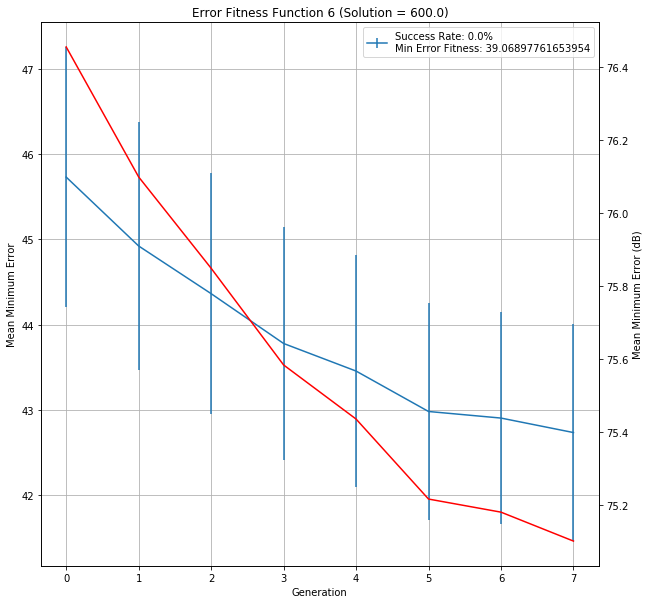

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[6_30_51_300_0.01_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,6,30,0.01,43.84365,44.22681,42.195985,42.573791,42.559847,43.961032,...,42.244804,43.455533,44.316702,40.112871,42.962899,42.584674,41.059642,42.736243,0:07:28,3000
